In [3]:
# all variables

task_names=["ANT","motorSelectiveStop_glm","stopSignal_glm","discountFix_glm","stroop_glm","CCTHot_glm","WATT3_glm","DPX_glm","twoByTwo_glm"]
subs='"sub-s597" "sub-s590" "sub-s599" "sub-s555" "sub-s358" "sub-s554" "sub-s130" "sub-s598" "sub-s553" "sub-s591" "sub-s596" "sub-s622" "sub-s613" "sub-s614" "sub-s640" "sub-s647" "sub-s649" "sub-s615" "sub-s612" "sub-s624" "sub-s623" "sub-s648" "sub-s445" "sub-s646" "sub-s641" "sub-s601" "sub-s639" "sub-s606" "sub-s608" "sub-s637" "sub-s061" "sub-s495" "sub-s609" "sub-s636" "sub-s631" "sub-s638" "sub-s607" "sub-s600" "sub-s585" "sub-s582" "sub-s549" "sub-s525" "sub-s373" "sub-s513" "sub-s577" "sub-s583" "sub-s548" "sub-s584" "sub-s570" "sub-s546" "sub-s579" "sub-s541" "sub-s512" "sub-s524" "sub-s558" "sub-s593" "sub-s567" "sub-s594" "sub-s556" "sub-s192" "sub-s533" "sub-s568" "sub-s557" "sub-s595" "sub-s561" "sub-s592" "sub-s644" "sub-s471" "sub-s643" "sub-s626" "sub-s619" "sub-s621" "sub-s617" "sub-s628" "sub-s610" "sub-s642" "sub-s645" "sub-s483" "sub-s611" "sub-s616" "sub-s629" "sub-s627" "sub-s618" "sub-s605" "sub-s602" "sub-s634" "sub-s633" "sub-s499" "sub-s497" "sub-s635" "sub-s251" "sub-s603" "sub-s604" "sub-s650" "sub-s234" "sub-s465" "sub-s491" "sub-s519" "sub-s526" "sub-s588" "sub-s581" "sub-s572" "sub-s586" "sub-s172" "sub-s144" "sub-s518" "sub-s587" "sub-s573" "sub-s574" "sub-s589"'
subs_list=subs.replace('"','').split()
rts=["rt_centered", "rt_duration", "rt_duration_only", "rt_uncentered"]
# csv_names=["VIF_contrast_s061_CCTHot_rt_centered.csv","VIF_s061_CCTHot_rt_centered.csv","contrast_matrix_s061_CCTHot_rt_centered.csv","corr_matrix_desmat_s061_CCTHot_rt_centered.csv","desmat_s061_CCTHot_rt_centered.csv"]
csv_names=["VIF_contrast_s","VIF_s","contrast_matrix","corr_matrix_desmat","desmat_s"]
html_suffix = "_model_summary.html"
contrast_dir="contrast_estimates"

In [ ]:
# saves missing subjects, csvs and htmls.
import os
# der_path = "/hopper/groups/enkavilab/data/ds004636/derivatives"
der_path = "/Users/ibrayyilmaz/Desktop/EnkaviLab/practice_code/rt_data_analysis/derivatives"

# Initialize missing file info
subject_missing = []
rt_missing = []
csv_missing = []
html_missing = []
contrast_missing = []

for task_name in task_names:
    task_path = os.path.join(der_path, task_name)
    subject_missing.append(f"\nMissing Subjects for {task_name}")
    
    # Check for missing subjects
    try:
        os_sub_list = os.listdir(task_path)
    except FileNotFoundError:
        subject_missing.append(f"Task directory missing: {task_path}")
        continue

    for sub in subs_list:
        if sub in os_sub_list:
            sub_path = os.path.join(task_path, sub)
            try:
                os_rt_list = os.listdir(sub_path)
            except FileNotFoundError:
                subject_missing.append(f"{sub}_missing_for_{task_name}")
                continue

            for rt in rts:
                if rt in os_rt_list:
                    rt_path = os.path.join(sub_path, rt)
                    try:
                        all_files = os.listdir(rt_path)
                    except FileNotFoundError:
                        rt_missing.append(f"{rt}_missing_for_{task_name}_{sub}")
                        continue

                    # Check CSVs
                    for csv_prefix in csv_names:
                        if not any(f.startswith(csv_prefix) and f.endswith(".csv") for f in all_files):
                            csv_missing.append(f"{csv_prefix}_missing_for_{task_name}_{sub}_{rt}")

                    # Check HTML
                    if not any(f.endswith(html_suffix) and "rtmodel_" in f for f in all_files):
                        html_missing.append(f"html_missing_for_{task_name}_{sub}_{rt}")

                    # Check contrast_estimates
                    contrast_path = os.path.join(rt_path, contrast_dir)
                    if os.path.exists(contrast_path):
                        contrast_files = [f for f in os.listdir(contrast_path) if f.endswith(".nii.gz")]
                        if not contrast_files:
                            contrast_missing.append(f"contrast_estimates_EMPTY_for_{task_name}_{sub}_{rt}")
                    else:
                        contrast_missing.append(f"contrast_estimates_DIR_MISSING_for_{task_name}_{sub}_{rt}")
                else:
                    rt_missing.append(f"{rt}_missing_for_{task_name}_{sub}")
        else:
            subject_missing.append(f"{sub}_missing_for_{task_name}")

# Save results to text files
with open("missing_file/missing_subjects.txt", "w") as f:
    f.write("\n".join(subject_missing))
with open("missing_file/missing_rts.txt", "w") as f:
    f.write("\n".join(rt_missing))
with open("missing_file/missing_csvs.txt", "w") as f:
    f.write("\n".join(csv_missing))
with open("missing_file/missing_htmls.txt", "w") as f:
    f.write("\n".join(html_missing))
with open("missing_file/missing_contrasts.txt", "w") as f:
    f.write("\n".join(contrast_missing))


motorSelectiveStop_glm
stopSignal_glm
discountFix_glm
stroop_glm
sub-s586
sub-s061
sub-s172
sub-s518
sub-s587
sub-s591
sub-s613
sub-s640
sub-s647
sub-s597
sub-s648
sub-s601
sub-s606
sub-s608
sub-s590
sub-s609
sub-s631
sub-s607
sub-s600
sub-s585
sub-s599
sub-s582
sub-s549
sub-s373
sub-s513
sub-s548
sub-s584
sub-s546
sub-s579
sub-s541
sub-s512
sub-s558
sub-s593
sub-s567
sub-s594
sub-s556
sub-s568
sub-s557
sub-s595
sub-s561
sub-s643
sub-s626
sub-s619
sub-s617
sub-s610
sub-s645
sub-s616
sub-s627
sub-s499
sub-s635
sub-s603
sub-s234
sub-s519
sub-s553
CCTHot_glm
WATT3_glm
DPX_glm
twoByTwo_glm


/var/folders/6t/qvhgkbhs66b_s3__l85fgf70v_zf1y/T/ipykernel_50352/590035759.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


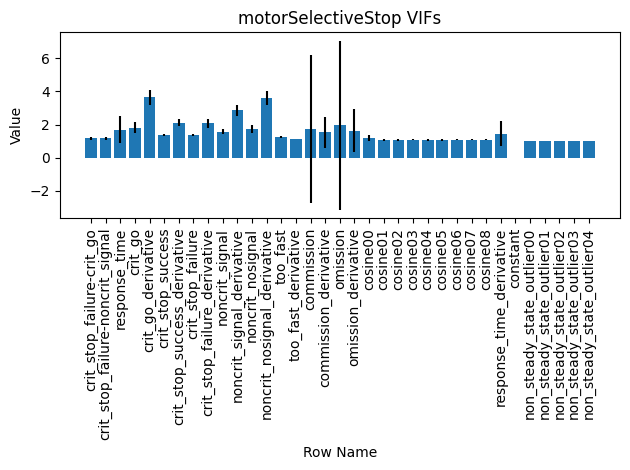

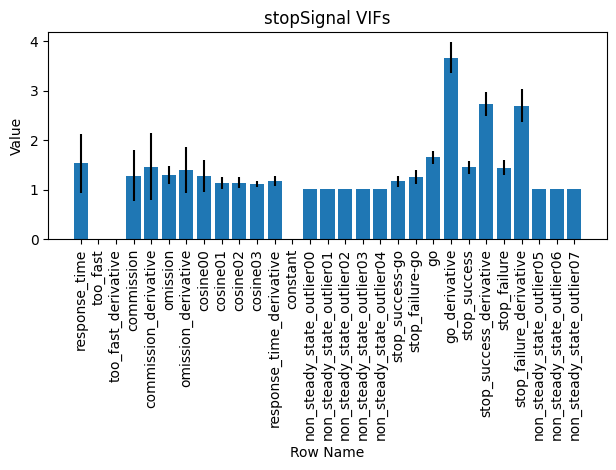

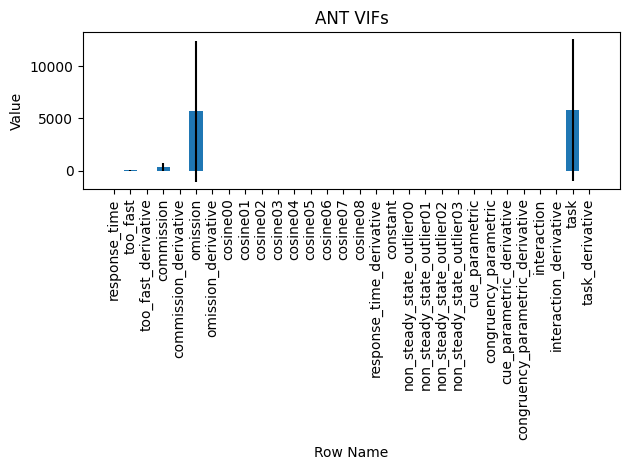

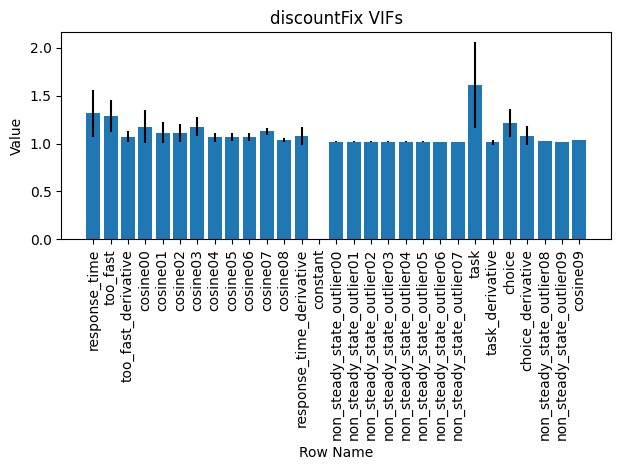

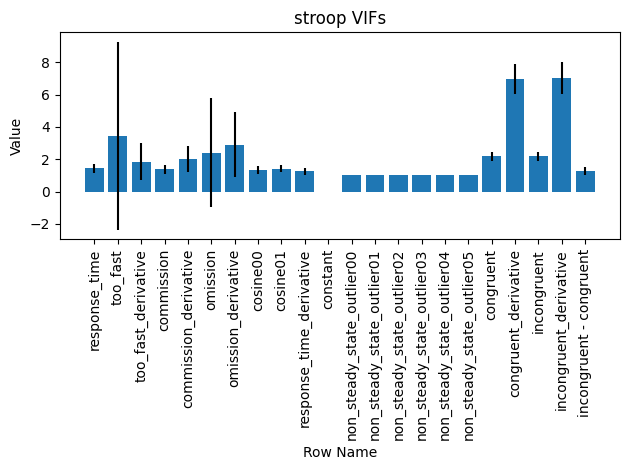

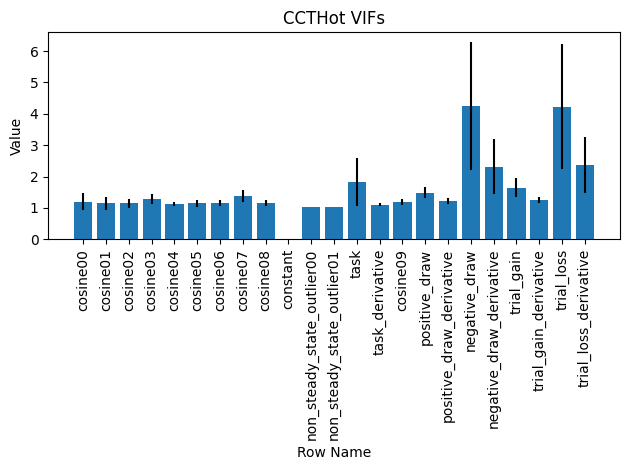

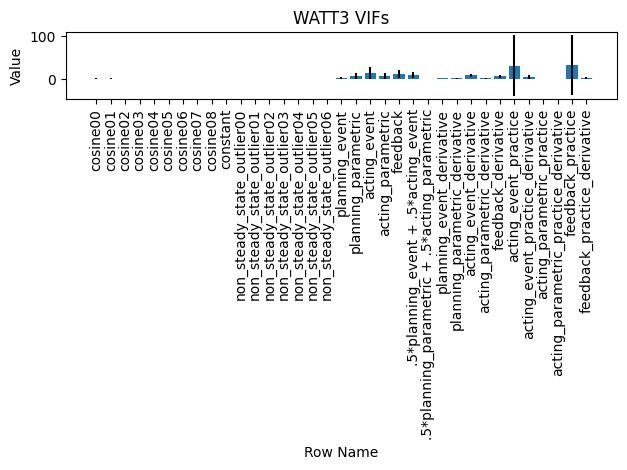

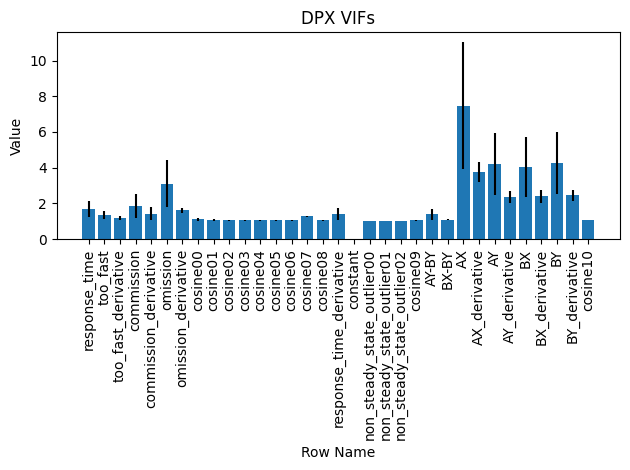

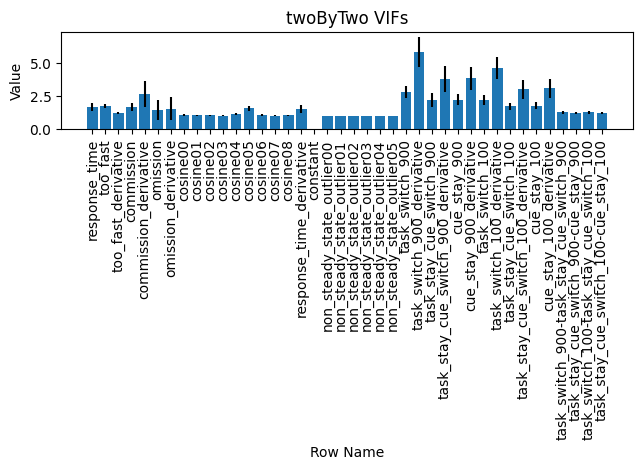

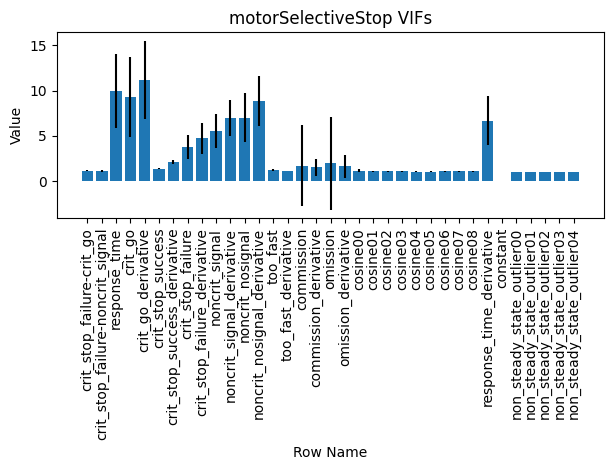

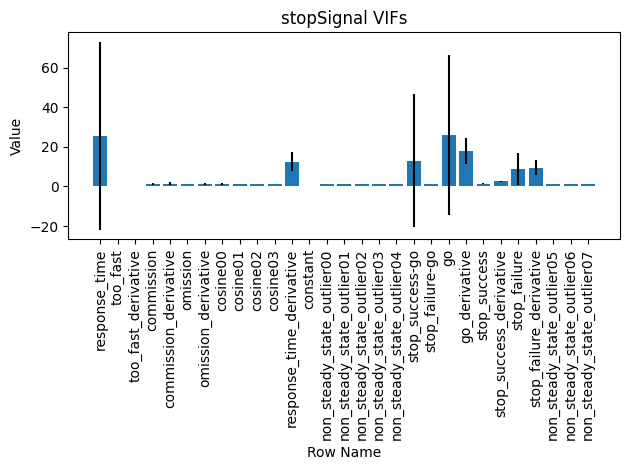

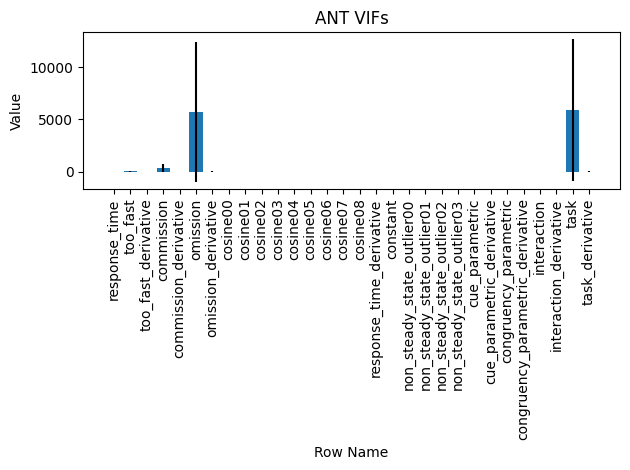

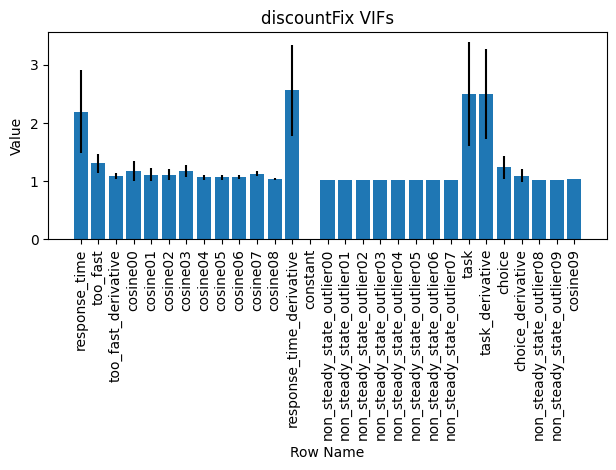

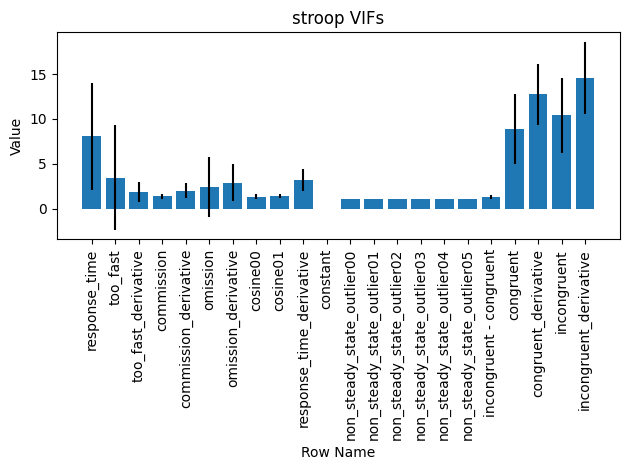

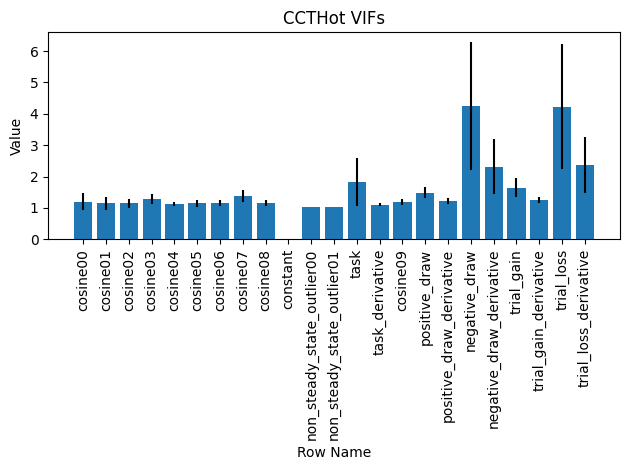

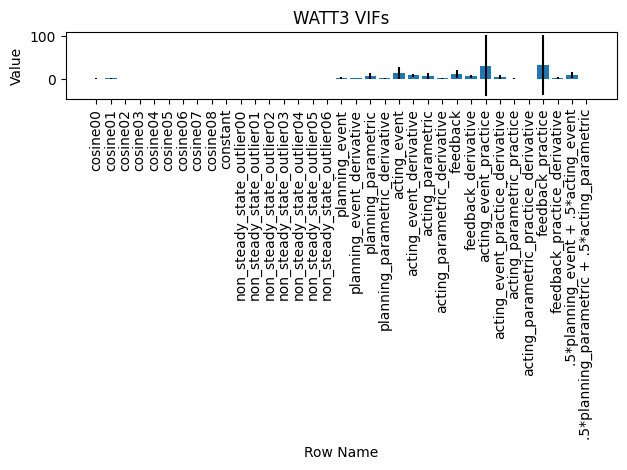

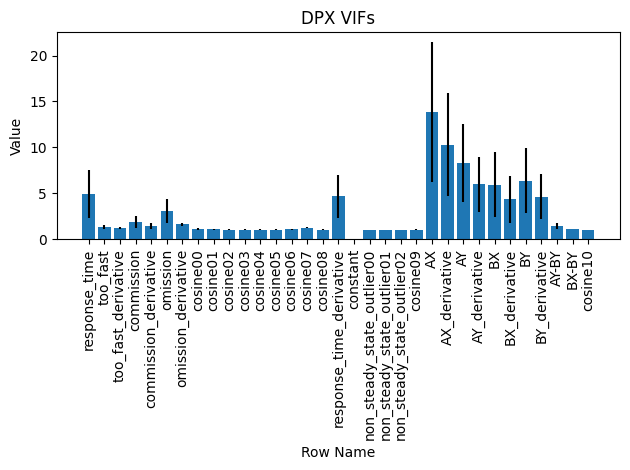

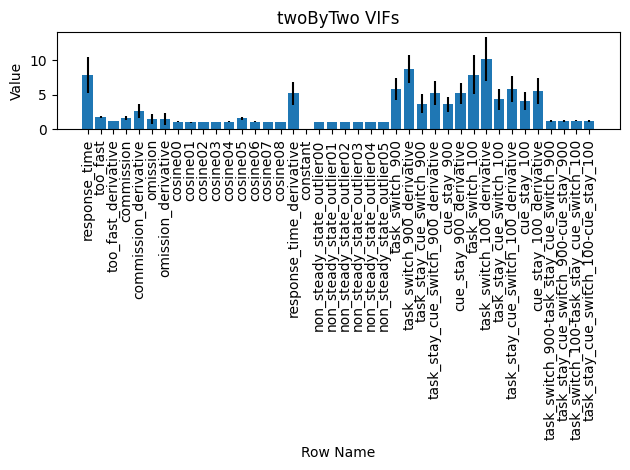

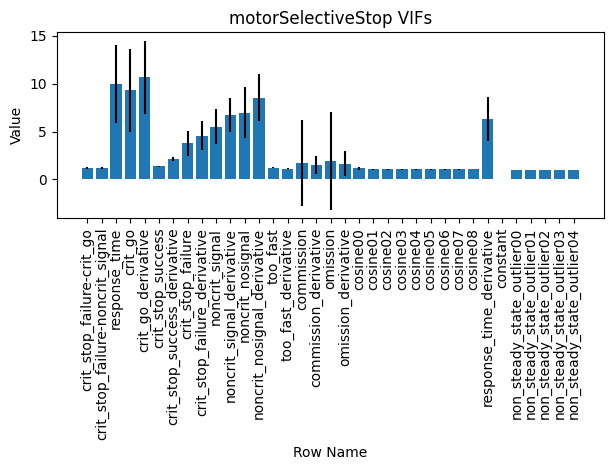

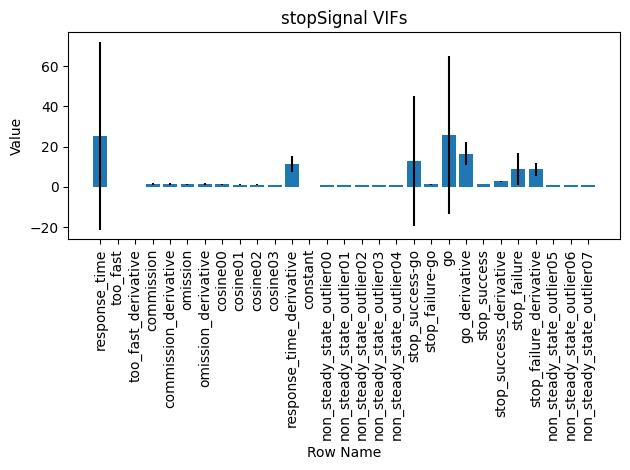

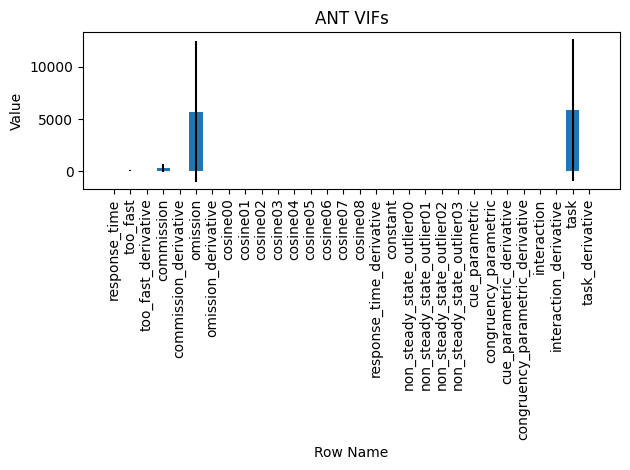

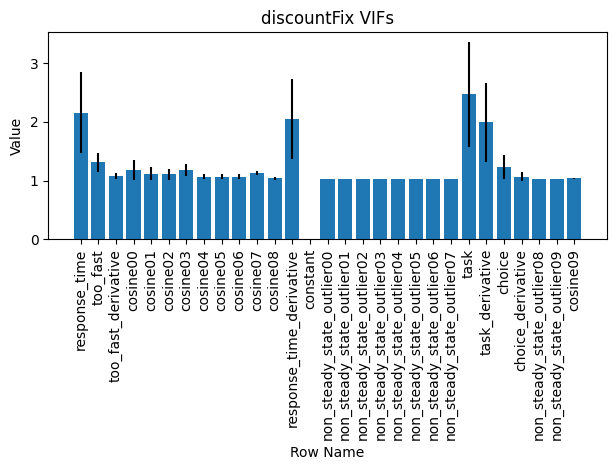

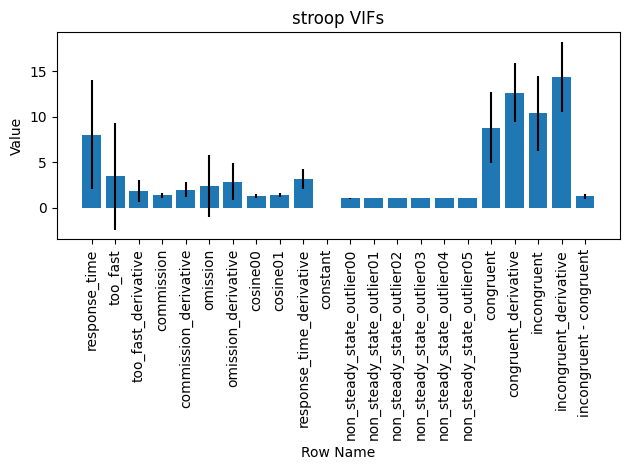

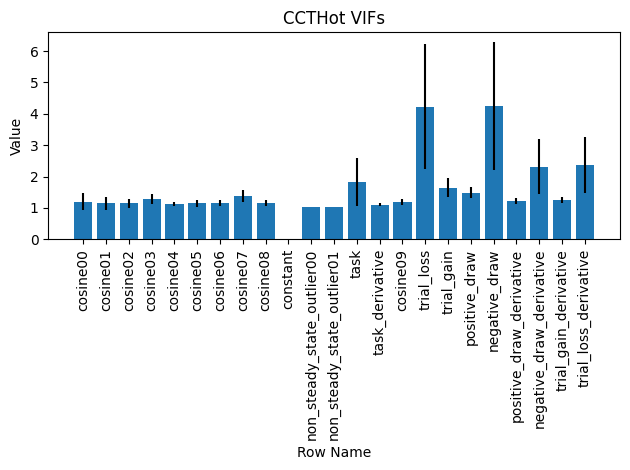

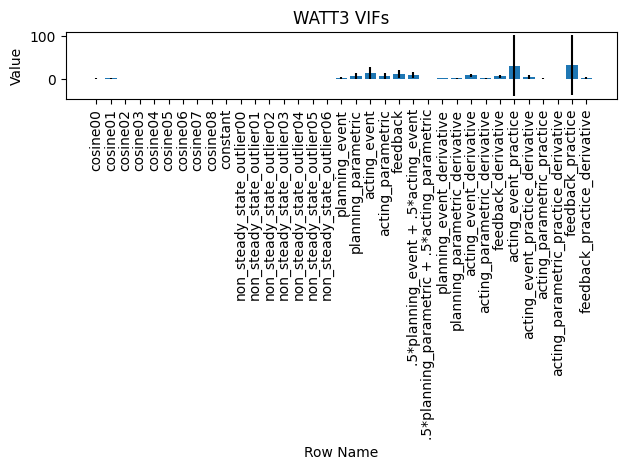

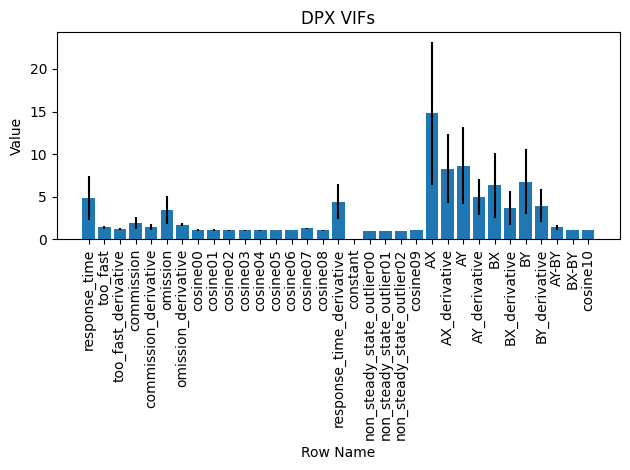

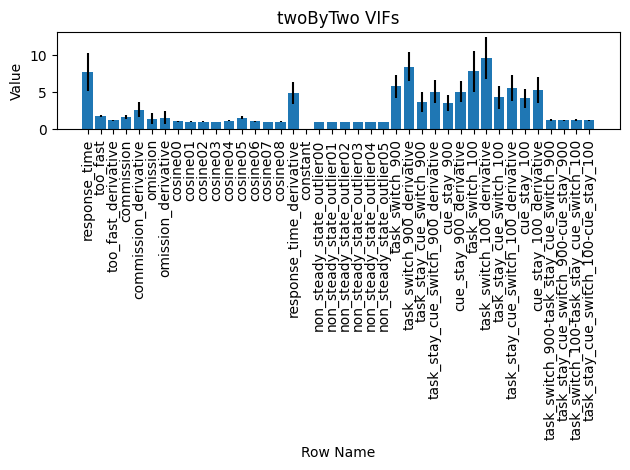

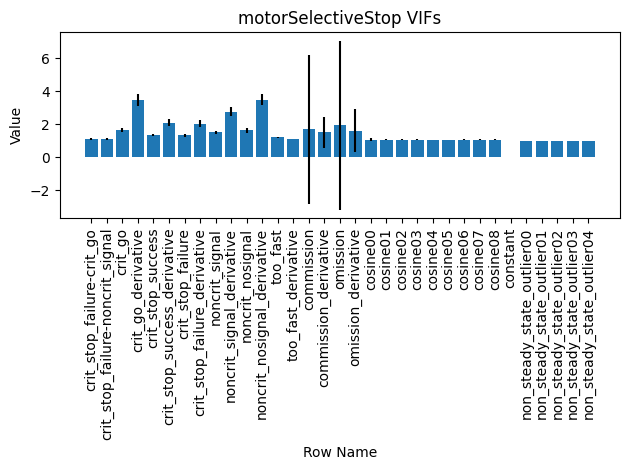

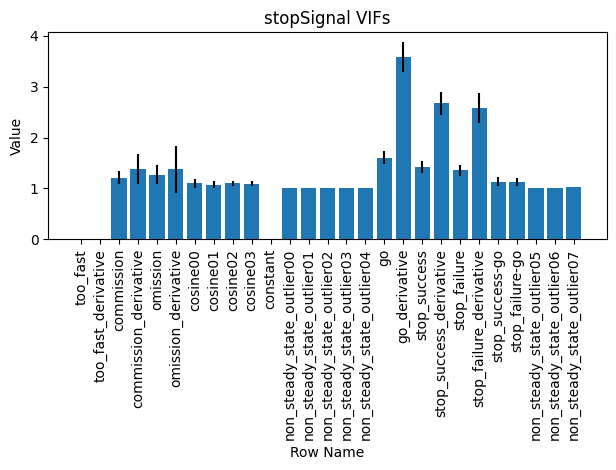

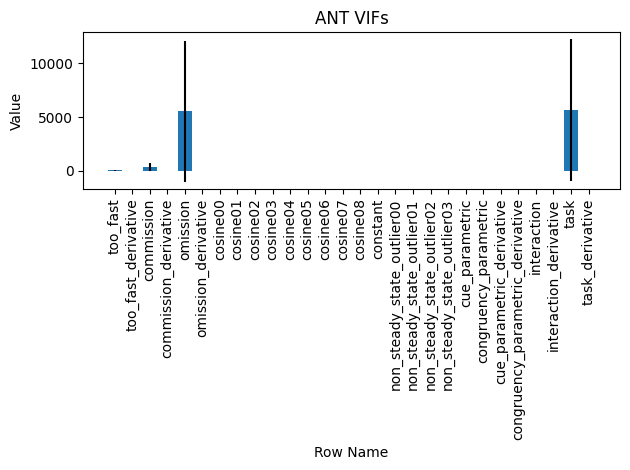

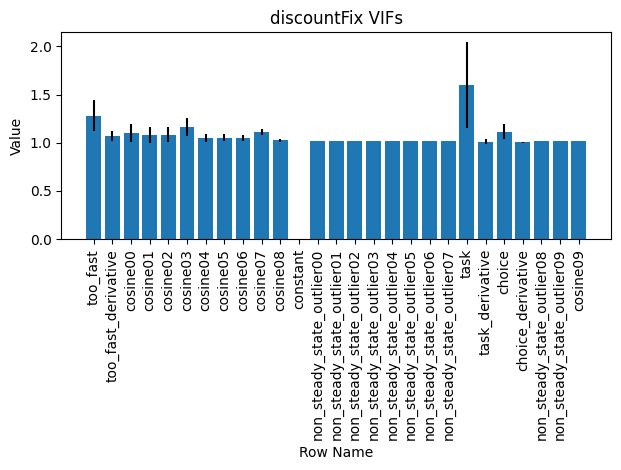

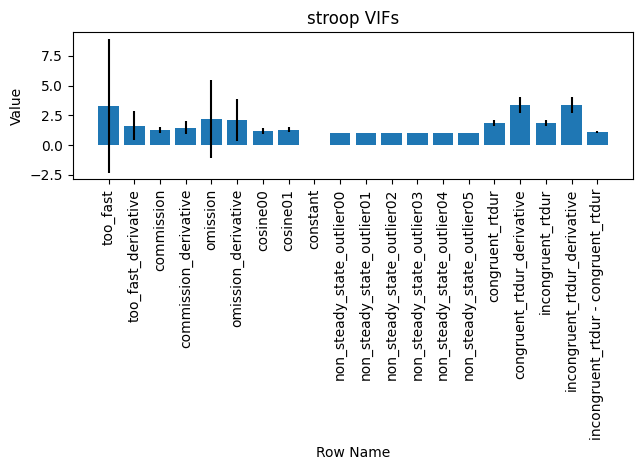

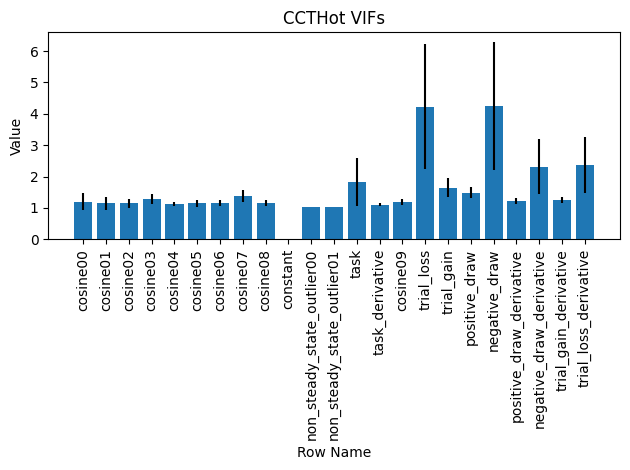

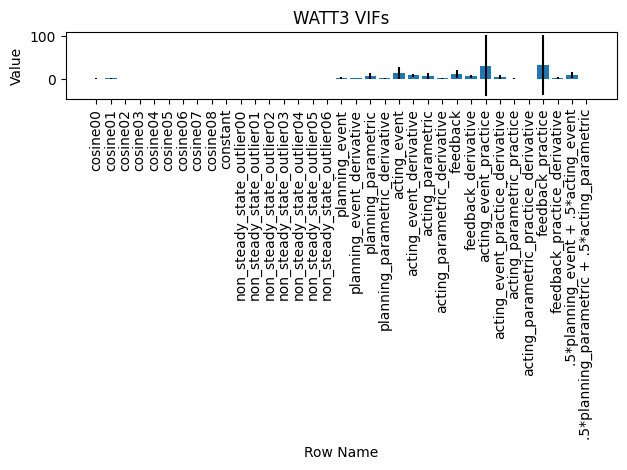

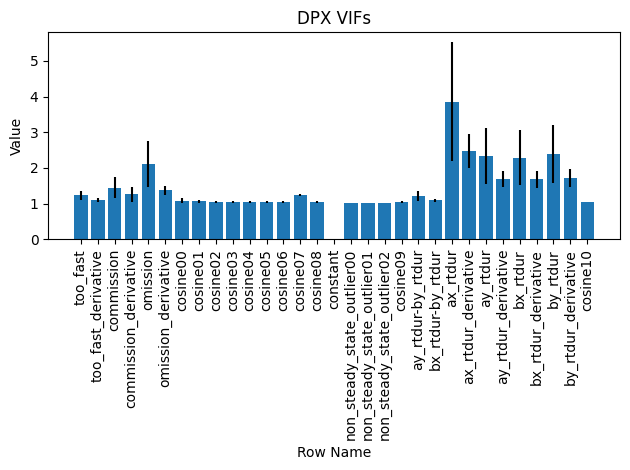

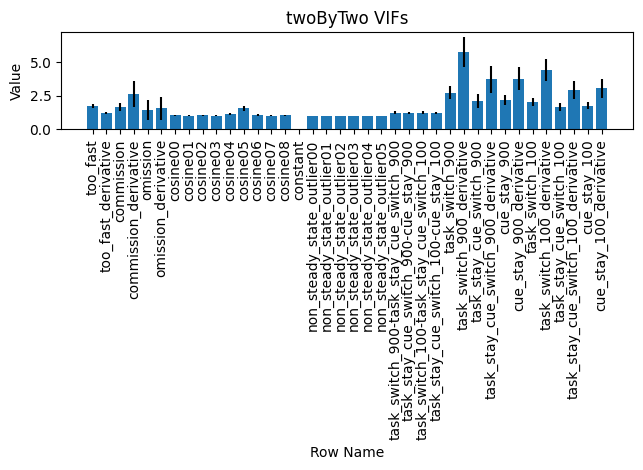

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import ast
import os

data_dir="/Users/ibrayyilmaz/Desktop/EnkaviLab/practice_code/rt_data_analysis/VIFs/"
rt_files=["avgVIF_pertask_rt_centered.csv","avgVIF_pertask_rt_uncentered.csv","avgVIF_pertask_rt_duration.csv",
          "avgVIF_pertask_rt_duration_only.csv"]
save_dir="/Users/ibrayyilmaz/Desktop/EnkaviLab/practice_code/rt_data_analysis/VIFs"

for i in range(len(rt_files)):
    data=os.path.join(data_dir,rt_files[i])
    df = pd.read_csv(data, index_col=0)

    # print(df.columns)
    for task in df.columns:
        task_vals=[]
        task_stds=[]
        task_labels=[]

        task_data = df[task].dropna()
        for name,val in task_data.items():
            try:
                val_list=ast.literal_eval(val)
                task_labels.append(name)
                task_stds.append(val_list[1])
                task_vals.append(val_list[0])
            except(ValueError, SyntaxError):
                continue

        fig, ax = plt.subplots()
        ax.bar(task_labels, task_vals,yerr=task_stds)
        ax.set_title(f"{task} VIFs")
        ax.set_xlabel("Row Name")
        ax.set_ylabel("Value")
        ax.tick_params(axis='x', rotation=90)
        save_path=os.path.join(save_dir,f"{rts[i]}_VIF_per_task")
        # makes sure all image items are in frame
        plt.tight_layout()
        if not os.path.isdir(save_path): 
            os.makedirs(save_path)
        plt.savefig(save_path+f"/{task}_VIFs", dpi=300)


In [2]:
import numpy as np
a=np.array([1,2,3])
print(sum(a))

6
